In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("weight-height.csv")

In [6]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Count'>

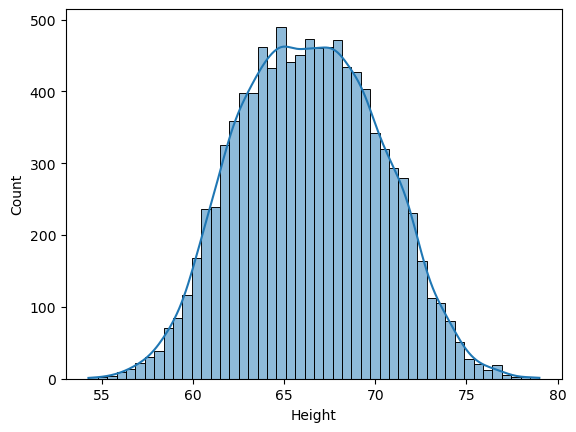

In [8]:
sns.histplot(data=df, x=df.Height,kde=True)

In [10]:
m=df.Height.mean()
m

66.36755975482124

In [12]:
s=df.Height.std()
s

3.8475281207732324

In [14]:
m-3*s  #-3sigma

54.82497539250154

In [16]:
m+3*s  # +3sigma


77.91014411714094

In [18]:
df[(df.Height>54)& (df.Height<77)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [20]:
df["zscore"]=(df.Height-m)/s  #z=  x-mean/std

In [22]:
df

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [24]:
df[(df.zscore>-3) & (df.zscore<3)]

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [26]:
df

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [28]:
df1=df.drop(["zscore","Gender"],axis=1)

# 

In [31]:
df1

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [33]:
corr1=df1.corr()

In [35]:
corr1


,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<Axes: >

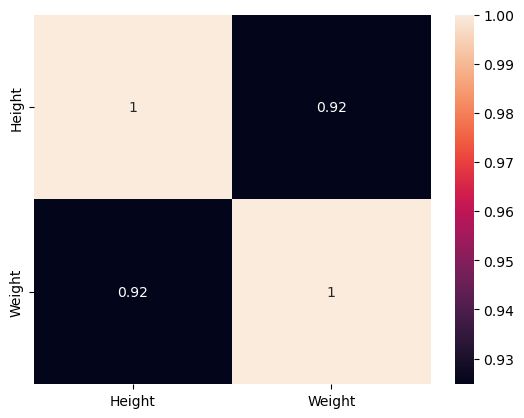

In [37]:
sns.heatmap(corr1,annot=True)

In [39]:
from scipy.stats import skew, kurtosis

In [43]:
df=pd.read_csv("Housing-Prices-master.csv")

In [45]:
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [47]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\DSML MENTOR\AppData\Local\Temp\ipykernel_16684\1343816741.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"],color='r')


<Axes: xlabel='SalePrice', ylabel='Density'>

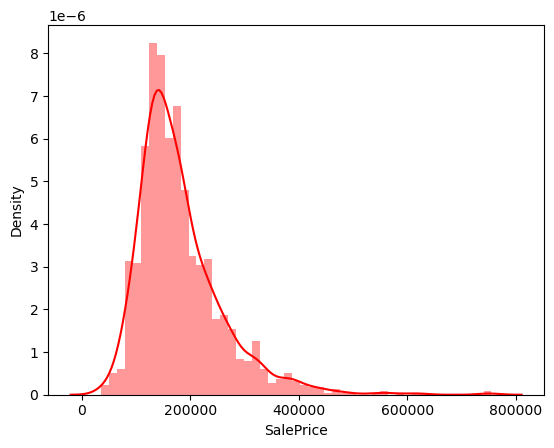

In [49]:
sns.distplot(df["SalePrice"],color='r')

In [51]:
df['SalePrice'].skew()

1.8828757597682129

In [53]:
kurtosis(df['SalePrice'],fisher=False)  

9.509812011089439

In [55]:
df['log_Saleprice']=np.log(df["SalePrice"])

In [57]:
df['log_Saleprice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: log_Saleprice, Length: 1460, dtype: float64

C:\Users\DSML MENTOR\AppData\Local\Temp\ipykernel_16684\1625447973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["log_Saleprice"],color='r')


<Axes: xlabel='log_Saleprice', ylabel='Density'>

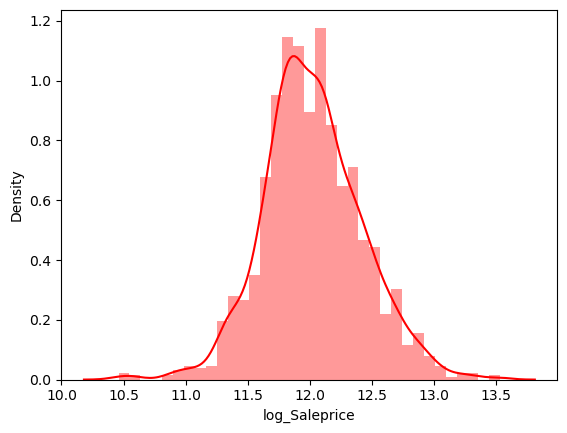

In [59]:
sns.distplot(df["log_Saleprice"],color='r')

In [61]:
df['log_Saleprice'].skew()

0.12133506220520406

In [63]:
kurtosis(df['log_Saleprice'],fisher=False)

3.8026555069117713